In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from imutils import face_utils, rotate_bound
import dlib
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook
import time
from IPython.display import clear_output, Image, display, HTML
import base64
%matplotlib inline

In [38]:
cap = cv2.VideoCapture(0)

In [39]:
cap.isOpened()

True

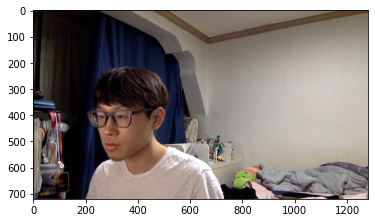

In [40]:
ret, frame = cap.read()
# frame = rotate_bound(frame, -90)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [41]:
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

In [42]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

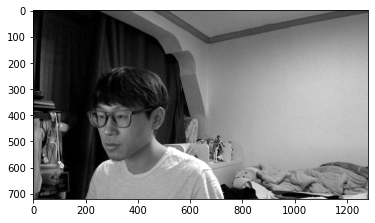

In [43]:
plt.imshow(gray, cmap='gray')

In [44]:
rects = detector(gray, 0)
rects.count

<bound method PyCapsule.count of rectangles[[(214, 373) (393, 552)]]>

In [45]:
image = frame.copy()
for (i, rect) in enumerate(rects):
        # Make the prediction and transfom it to numpy array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # Draw on our image, all the finded cordinate points (x,y)
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)


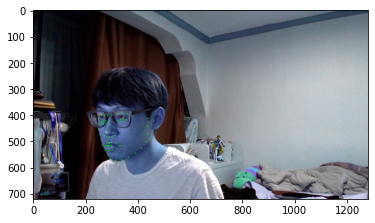

In [46]:
plt.imshow(image)

In [47]:
cap.release()

In [29]:
def arrayShow (imageArray):
    ret, png = cv2.imencode('.png', imageArray)
#     encoded = base64.b64encode(png)
    return Image(data=png)

In [48]:
cap = cv2.VideoCapture(0)

In [49]:
while(True):
    try:
        clear_output(wait=True)
        _, frame = cap.read()
        lines, columns, _ =  frame.shape
        frame = cv2.resize(frame, (int(columns/4), int(lines/4)))

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        rects = detector(gray, 0)

        image = frame.copy()
        for (i, rect) in enumerate(rects):
            # Make the prediction and transfom it to numpy array
            shape = predictor(gray, rect)
            shape = face_utils.shape_to_np(shape)

            # Draw on our image, all the finded cordinate points (x,y)
            for (x, y) in shape:
                cv2.circle(image, (x, y), 2, (0, 255, 0), -1)


        img = arrayShow(image)
        display(img)
        time.sleep(0.2)
    except KeyboardInterrupt:
        cap.release()

AttributeError: 'NoneType' object has no attribute 'shape'

In [19]:
cap.release()